<a href="https://colab.research.google.com/github/riyaz7781/riyaz7781/blob/main/MLR(Question_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor


Load the dataset

In [ ]:
data1=pd.read_csv("/content/50_Startups.csv")
data1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Exploratory Data Analysis

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data1.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
data1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data1.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
data2=data1.rename({"R&D Spend":"RDS","Administration":"ADM","Marketing Spend":"MS"},axis=1)
data2.head(2)

,RDS,ADM,MS,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


Correlation Analysis

In [ ]:
data2.corr()

<ipython-input-16-41dc7ecd48ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corr()


,RDS,ADM,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Pair plotting to observe relation

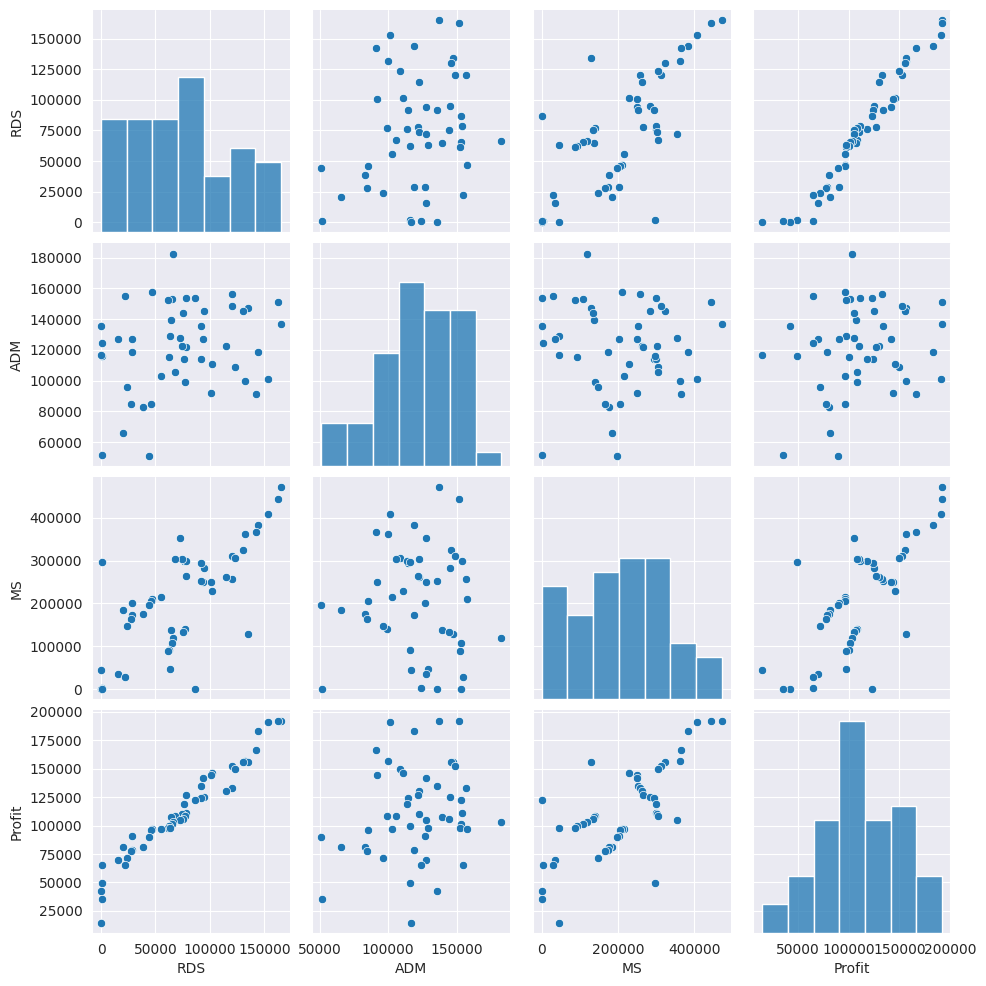

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(data2)

Model Building

In [ ]:
model=smf.ols("Profit~RDS+ADM+MS",data=data2).fit()
model.params,model.summary()


Since ADM and MS has insignificant values,so build the models for them

In [ ]:
model_adm=smf.ols("Profit~ADM",data=data2).fit()
model_adm.summary()

In [ ]:
model_ms=smf.ols("Profit~MS",data=data2).fit()
model_ms.summary()

In [ ]:
model_adm_ms=smf.ols("Profit~ADM+MS",data=data2).fit()
model_adm_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           2.50e-10
Time:                        13:36:22   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADM            0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Residual analysis

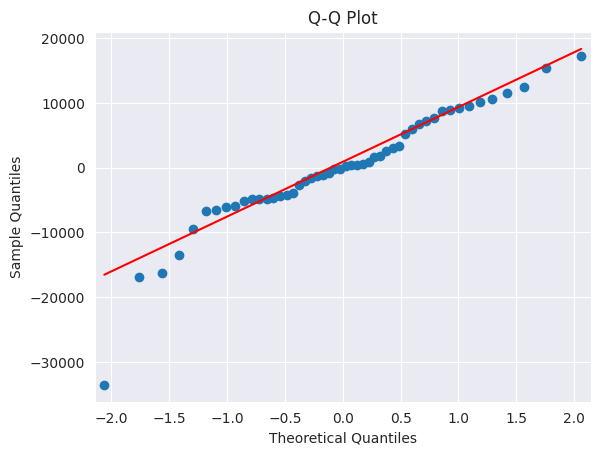

In [ ]:
sns.set_style("darkgrid")
sm.qqplot(model.resid,line="q")
plt.title("Q-Q Plot")
plt.show()

In [ ]:
list(np.where(model.resid<-10000))

[array([14, 15, 48, 49])]

Homoscedacity Checking

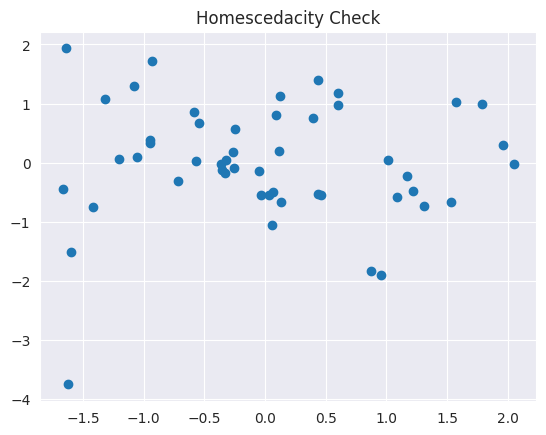

In [ ]:
def plot_resid_fitted(vals):
  return (vals-vals.mean())/vals.std()
plt.scatter(plot_resid_fitted(model.fittedvalues),plot_resid_fitted(model.resid))
plt.title("Homescedacity Check")
plt.show()

Model Deletion Diagnostics (Cooks Distance)

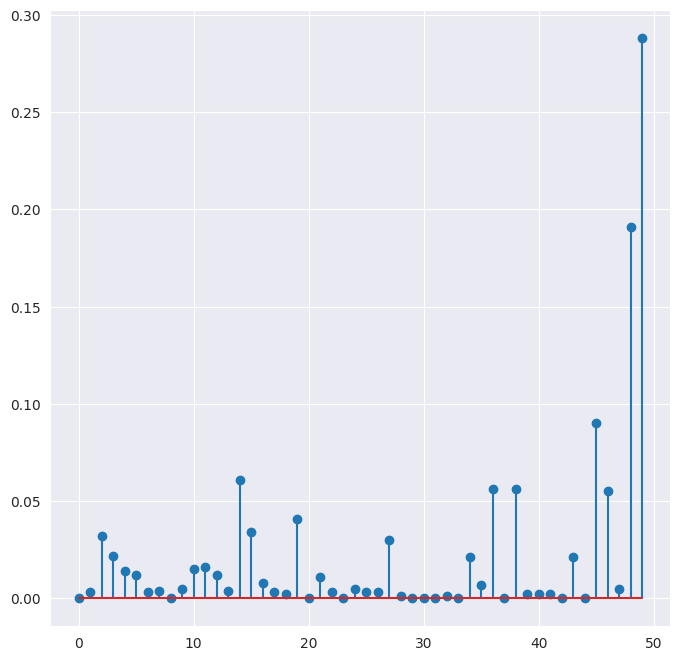

In [ ]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
fig=plt.subplots(figsize=(8,8))
plt.stem(np.arange(len(data2)),np.round(c,3))
plt.show()

Influence Plots

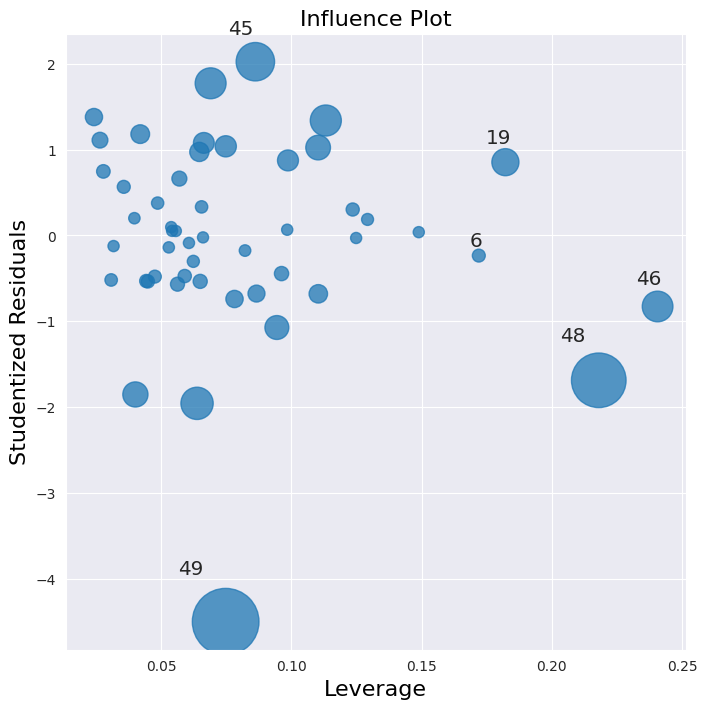

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
fig=influence_plot(model,ax=ax)

Improving the model

In [ ]:
data3=data2.drop(data2.index[[49]],axis=0).reset_index(drop=True)
data3

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Final Model Building

In [ ]:
final_model=smf.ols("Profit~RDS+ADM+MS",data=data3).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           8.85e-32
Time:                        14:26:42   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADM           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred_1=pd.DataFrame({"RDS":"10000","ADM":"87199.00","MS":"91872.198"},index=[1])
pred_1

,RDS,ADM,MS
1,10000,87199.00,91872.198


Model Prediction

In [ ]:
final_mo=final_model.predict(data3)
final_mo

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

Final R Square Values

In [ ]:
model.rsquared

0.9507459940683246

In [ ]:
final_model.rsquared

0.9613162435129847